<a href="https://colab.research.google.com/github/ShivamPatel26684/DS-3001-Project/blob/main/Ds3001Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [60]:
import pandas as pd
#
var_list = ['sex','race','class', 'degree','courts'] # List of variables to save
output_file = 'tidyData.csv' # Name of the file to save the data to
#
modes = ['w','a'] # Has write mode and append mode
phase = 0 # Starts in write mode; after one iteration of loop, switches to append mode
#
for k in range(37): # r each chunk of the data
    url = 'https://github.com/DS3001/gss_zip/raw/main/gss_' + str(1+k) + '.csv' # Create url to the chunk to be processed
    print(url) # Check the url is correct
    df = pd.read_csv(url,low_memory=False) # Download this chunk of data
    print(df.head()) # Visually inspect the first few rows
    df.loc[:,var_list].to_csv(output_file, # specifies target file to save the chunk to
                              mode=modes[phase], # control write versus append
                              header=var_list, # variable names
                              index=False) # no row index saved
    phase = 1 # Switch from write mode to append mode
    k =+ 1

https://github.com/DS3001/gss_zip/raw/main/gss_1.csv
   Unnamed: 0  year  id            wrkstat  hrs1  hrs2 evwork    occ  \
0           1  1972   1  working full time   NaN   NaN    NaN  205.0   
1           2  1972   2            retired   NaN   NaN    yes  441.0   
2           3  1972   3  working part time   NaN   NaN    NaN  270.0   
3           4  1972   4  working full time   NaN   NaN    NaN    1.0   
4           5  1972   5      keeping house   NaN   NaN    yes  385.0   

   prestige        wrkslf  ...  instype02  instype03  instype04  \
0      50.0  someone else  ...        NaN        NaN        NaN   
1      45.0  someone else  ...        NaN        NaN        NaN   
2      44.0  someone else  ...        NaN        NaN        NaN   
3      57.0  someone else  ...        NaN        NaN        NaN   
4      40.0  someone else  ...        NaN        NaN        NaN   

   totalincentive  wtssps_nea  wtssnrps_nea  wtssps_next  wtssnrps_next  \
0             NaN         NaN       

In [61]:
df = pd.read_csv('tidyData.csv')
print(df.shape)
df.head(5)

(72426, 5)


,sex,race,class,degree,courts
0,female,white,middle class,bachelor's,about right
1,male,white,middle class,less than high school,not harshly enough
2,female,white,working class,high school,not harshly enough
3,female,white,middle class,bachelor's,about right
4,female,white,working class,high school,not harshly enough


In [62]:
df = df.rename(columns = {'sex':'Sex','race':'Race','class':'Social Class','degree':'Degree','courts':'Courts Deal With Criminals'})
df.head()

,Sex,Race,Social Class,Degree,Courts Deal With Criminals
0,female,white,middle class,bachelor's,about right
1,male,white,middle class,less than high school,not harshly enough
2,female,white,working class,high school,not harshly enough
3,female,white,middle class,bachelor's,about right
4,female,white,working class,high school,not harshly enough


In [63]:
#Cleaning Sex Variable
var = "Sex"
print("Before Cleaning Sex:\n",df[var].unique(),'\n')
print(df[var].value_counts(),'\n')
print('Total number of null responses:',df[var].isna().sum(),'\n')
df1 = df.dropna(subset=[var])#Drop all rows where sex is null
df1 = df1[df1['Sex'] != 'sex']#Drop all rows where sex is 'sex'
print("After Cleaning Sex:\n",df1[var].unique(),'\n')
print(df1[var].value_counts(),'\n')
print('Total number of null responses:',df1[var].isna().sum())
df = df1

Before Cleaning Sex:
 ['female' 'male' 'sex' nan] 

female    40301
male      31977
sex          36
Name: Sex, dtype: int64 

Total number of null responses: 112 

After Cleaning Sex:
 ['female' 'male'] 

female    40301
male      31977
Name: Sex, dtype: int64 

Total number of null responses: 0


In [64]:
#Cleaning Race Variable
var = "Race"
print("Before Cleaning Race:\n",df[var].unique(),'\n')
print(df[var].value_counts(),'\n')
print('Total number of null responses:',df[var].isna().sum(),'\n')
df1 = df.dropna(subset=[var])#Drop all rows where race is null
print("After Cleaning Race:\n",df1[var].unique(),'\n')
print(df1[var].value_counts(),'\n')
print('Total number of null responses:',df1[var].isna().sum())
df = df1

Before Cleaning Sex:
 ['white' 'black' 'other' nan] 

white    57601
black    10189
other     4387
Name: Race, dtype: int64 

Total number of null responses: 101 

After Cleaning Sex:
 ['white' 'black' 'other'] 

white    57601
black    10189
other     4387
Name: Race, dtype: int64 

Total number of null responses: 0


In [65]:
#Cleaning Social Class Variable
var = "Social Class"
print("Before Cleaning Class:\n",df[var].unique(),'\n')
print(df[var].value_counts(),'\n')
print('Total number of null responses:',df[var].isna().sum(),'\n')
df1 = df.dropna(subset=[var])#Drop all rows where class is null
df1 = df1[df1['Social Class'] != 'no class']#Drop all rows where class is 'no class'
print("After Cleaning Class:\n",df1[var].unique(),'\n')
print(df1[var].value_counts(),'\n')
print('Total number of null responses:',df1[var].isna().sum())
df = df1

Before Cleaning Sex:
 ['middle class' 'working class' 'upper class' 'lower class' nan 'no class'] 

middle class     30936
working class    30848
lower class       4572
upper class       2292
no class             1
Name: Social Class, dtype: int64 

Total number of null responses: 3528 

After Cleaning Sex:
 ['middle class' 'working class' 'upper class' 'lower class'] 

middle class     30936
working class    30848
lower class       4572
upper class       2292
Name: Social Class, dtype: int64 

Total number of null responses: 0


In [66]:
#Cleaning Degree Variable
var = "Degree"
print("Before Cleaning Degree:\n",df[var].unique(),'\n')
print(df[var].value_counts(),'\n')
print('Total number of null responses:',df[var].isna().sum(),'\n')
df1 = df.dropna(subset=[var])#Drop all rows where degree is null
print("After Cleaning Degree:\n",df1[var].unique(),'\n')
print(df1[var].value_counts(),'\n')
print('Total number of null responses:',df1[var].isna().sum())
df = df1

Before Cleaning Sex:
 ["bachelor's" 'less than high school' 'high school' 'graduate'
 'associate/junior college' nan] 

high school                 34628
less than high school       13257
bachelor's                  10745
graduate                     5692
associate/junior college     4167
Name: Degree, dtype: int64 

Total number of null responses: 159 

After Cleaning Sex:
 ["bachelor's" 'less than high school' 'high school' 'graduate'
 'associate/junior college'] 

high school                 34628
less than high school       13257
bachelor's                  10745
graduate                     5692
associate/junior college     4167
Name: Degree, dtype: int64 

Total number of null responses: 0


In [67]:
#Cleaning Courts Deal With Criminals
var = "Courts Deal With Criminals"
print("Before Cleaning Court:\n",df[var].unique(),'\n')
print(df[var].value_counts(),'\n')
print('Total number of null responses:',df[var].isna().sum(),'\n')
df1 = df.dropna(subset=[var])#Drop all rows where degree is null
print("After Cleaning Court:\n",df1[var].unique(),'\n')
print(df1[var].value_counts(),'\n')
print('Total number of null responses:',df1[var].isna().sum())
df = df1

Before Cleaning Sex:
 ['about right' 'not harshly enough' nan 'too harshly'] 

not harshly enough    42084
about right            7693
too harshly            4457
Name: Courts Deal With Criminals, dtype: int64 

Total number of null responses: 14255 

After Cleaning Sex:
 ['about right' 'not harshly enough' 'too harshly'] 

not harshly enough    42084
about right            7693
too harshly            4457
Name: Courts Deal With Criminals, dtype: int64 

Total number of null responses: 0


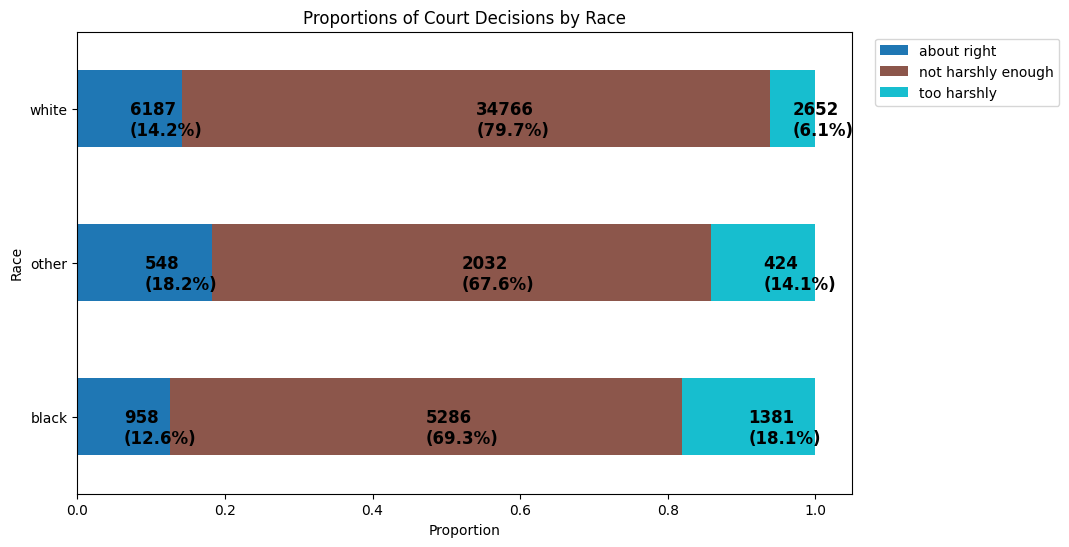

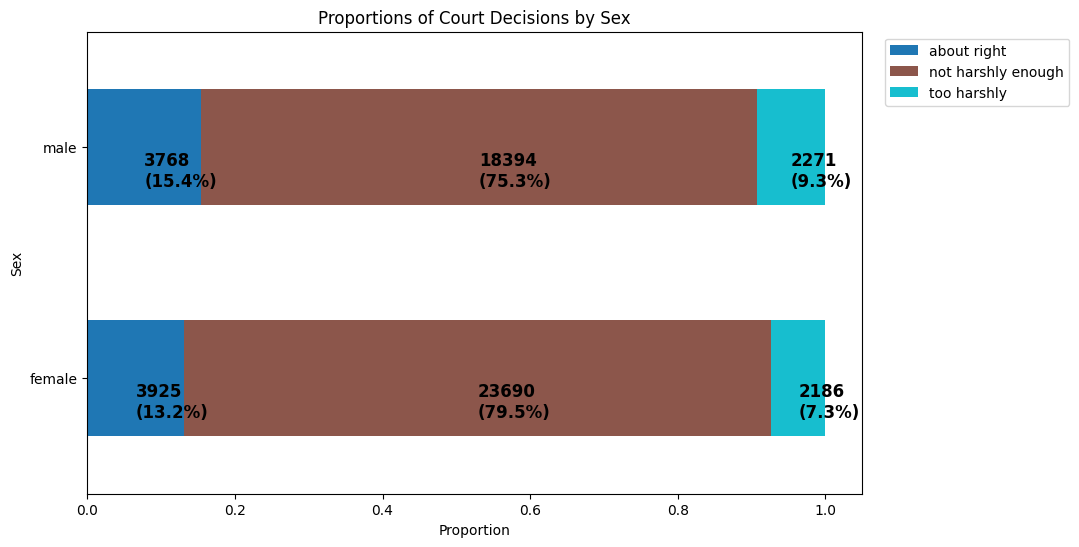

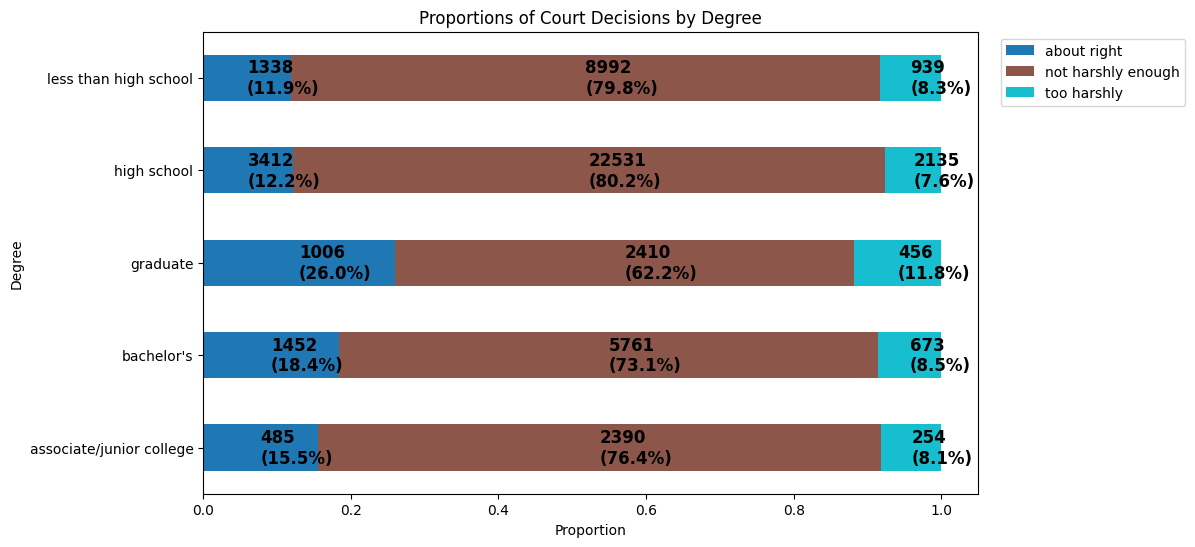

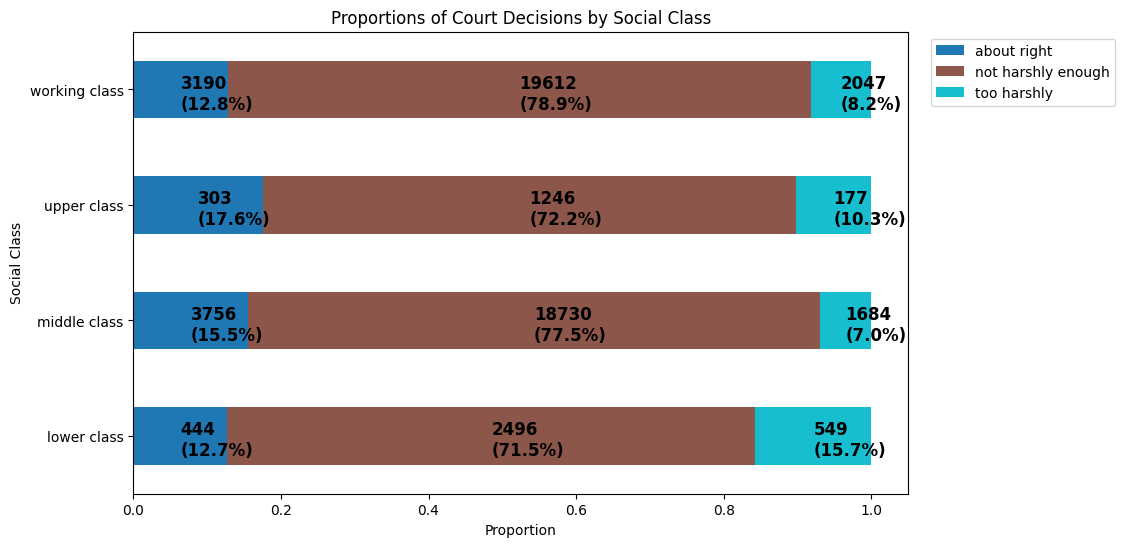

In [88]:
#Stacked bar chart showing how opinions on how the court treats criminals varies based on race
#citation: https://towardsdatascience.com/100-stacked-charts-in-python-6ca3e1962d2b
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
variableList = ['Race','Sex','Degree','Social Class']
for i in variableList:
  crossTabProportion = pd.crosstab(index = df[i],columns = df['Courts Deal With Criminals'],normalize = 'index')
  crossTab = pd.crosstab(index = df[i],columns = df['Courts Deal With Criminals'])
  crossTabProportion.plot(kind = 'barh',stacked = True,colormap = 'tab10',figsize = (10,6))
  plt.legend(loc="upper left", ncol=1,bbox_to_anchor=(1.02, 1.0))
  plt.ylabel(i)
  plt.xlabel("Proportion")
  plt.title("Proportions of Court Decisions by "+ i)

  for n, x in enumerate([*crossTab.index.values]):

    for (proportion,count,yLoc) in zip(crossTabProportion.loc[x],crossTab.loc[x],crossTabProportion.loc[x].cumsum()):
        plt.text(x=(yLoc-proportion)+(proportion/2),y=n-0.17,s=f'{count}\n({np.round(proportion * 100, 1)}%)', color="black",fontsize=12,fontweight="bold")
  plt.show()
  print('\n')